

---

# DATASET DOWNLOAD

In [1]:
import kagglehub

path = kagglehub.dataset_download("andrewmvd/ocular-disease-recognition-odir5k")

print("Path to dataset files:", path)

'''
possiamo decidere il numero di classi, sviluppare almeno 2 algoritmi di classificazione
per esempio algoritmo CNN e algoritmo estrazione delle features.
layer da aggiungere nelle reti neurali vantaggio e svantaggio nell'aggiungerlo, le sue caratteristiche
Keras libreria per deep learning per python, sviluppato da Google, più utilizzata per le immagini
PyTorch sviluppata da Facebook
si possono utilizzare insieme
'''



100%|██████████| 1.62G/1.62G [00:22<00:00, 79.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/ocular-disease-recognition-odir5k/versions/2


"\npossiamo decidere il numero di classi, sviluppare almeno 2 algoritmi di classificazione\nper esempio algoritmo CNN e algoritmo estrazione delle features.\nlayer da aggiungere nelle reti neurali vantaggio e svantaggio nell'aggiungerlo, le sue caratteristiche\nKeras libreria per deep learning per python, sviluppato da Google, più utilizzata per le immagini\nPyTorch sviluppata da Facebook\nsi possono utilizzare insieme\n"



---

# ORGANIZZAZIONE DATI E ANALISI HSV

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from scipy.stats import skew


immaginipath=path+"/preprocessed_images"
data=pd.read_csv(path+'/full_df.csv')
#print(np.shape(data))
#righe=print(len(data['N']))
#print(data['N'][1])

N, D, G, C, A, H, M, O = [], [], [], [], [], [], [], []

TOT = [N,D,G,C,A,H,M,O]
TOT_ = ['N','D','G','C','A','H','M','O']
#divisione delle immagini
for i in range(np.shape(data)[0]):
  if data['labels'][i]=="['N']":
    N.append(data['filename'][i])
  elif data['labels'][i]=="['D']":
    D.append(data['filename'][i])
  elif data['labels'][i]=="['G']":
    G.append(data['filename'][i])
  elif data['labels'][i]=="['C']":
    C.append(data['filename'][i])
  elif data['labels'][i]=="['A']":
    A.append(data['filename'][i])
  elif data['labels'][i]=="['H']":
    H.append(data['filename'][i])
  elif data['labels'][i]=="['M']":
    M.append(data['filename'][i])
  elif data['labels'][i]=="['O']":
    O.append(data['filename'][i])


def create_circular_mask(h, w, center=None, radius=None):
    """
    Crea una maschera circolare di dimensioni h x w.
    - center: (x, y) centro del cerchio. Se None, è il centro dell'immagine.
    - radius: raggio del cerchio. Se None, usa il più piccolo tra altezza/larghezza.
    """
    if center is None:
        center = (int(w/2), int(h/2))  # Centro dell'immagine
    if radius is None:
        radius = min(h, w) // 4  # Raggio di default

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    mask = dist_from_center <= radius
    return mask

results =[]
categories = {
    "N": N, "D": D, "G": G, "C": C,
    "A": A, "H": H, "M": M, "O": O
}

for category, images in categories.items():
  for file in images: #gira sulle immagini della malattia
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
    # Dimensioni dell'immagine
    h, w, _ = img.shape

    # Crea la maschera circolare
    center = (w // 2, h // 2)  # Centro dell'immagine
    radius = 256  # Raggio del cerchio
    circular_mask = create_circular_mask(h, w, center=center, radius=radius)

    # Applica la maschera al canale H
    img_circular = img[circular_mask]

    # Calcola le statistiche sui pixel della patch circolare
    mean_h_circular = np.mean(img_circular)
    median_h_circular = np.median(img_circular)
    std_h_circular = np.std(img_circular)

    # Crea una versione dell'immagine con la maschera applicata
    masked_image = np.copy(img)
    masked_image[~circular_mask] = 0  # Imposta i pixel esterni al cerchio a 0
   # Applica la maschera ai canali HSV
    H, S, V = cv2.split(img)
    H_circular = H[circular_mask]
    S_circular = S[circular_mask]
    V_circular = V[circular_mask]

  # Calcola le statistiche per la patch
    stats = {
        'Category': category,
        'Image': file,
        'Mean_H': np.mean(H_circular),
        'Median_H': np.median(H_circular),
        'Std_H': np.std(H_circular),
        'Mean_S': np.mean(S_circular),
        'Median_S': np.median(S_circular),
        'Std_S': np.std(S_circular),
        'Mean_V': np.mean(V_circular),
        'Median_V': np.median(V_circular),
        'Std_V': np.std(V_circular)
    }
    results.append(stats)

# Crea un DataFrame dai risultati
df_stats = pd.DataFrame(results)

# Salva i risultati su un file CSV
df_stats.to_csv("hsv_patch_stats.csv", index=False)

# Visualizza i primi risultati
print(df_stats.head())


'''
#print(N,'\n',D,'\n',G,'\n',C,'\n',A,'\n',H,'\n',M,'\n',O)
# Creazione di un dizionario per hue, sat e val
hue = {'Nh': [], 'Dh': [], 'Gh': [], 'Ch': [], 'Ah': [], 'Hh': [], 'Mh': [], 'Oh': []}
sat = {'Ns': [], 'Ds': [], 'Gs': [], 'Cs': [], 'As': [], 'Hs': [], 'Ms': [], 'Os': []}
val = {'Nv': [], 'Dv': [], 'Gv': [], 'Cv': [], 'Av': [], 'Hv': [], 'Mv': [], 'Ov': []}

keys_hue = list(hue.keys())  # Ottieni le chiavi del dizionario hue
keys_sat = list(sat.keys())  # Ottieni le chiavi del dizionario sat
keys_val = list(val.keys())  # Ottieni le chiavi del dizionario val

hue_mean, hue_std, hue_skw = hue.copy(), hue.copy(), hue.copy()
sat_mean, sat_std, sat_skw = sat.copy(), sat.copy(), sat.copy()
val_mean, val_std, val_skw = val.copy(), val.copy(), val.copy()

#plotted = False

for i in range(len(TOT)): #gira sulle malattie
  for file in TOT[i]: #gira sulle immagini della malattia
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
    #calcolo sulle singole immagini
    #hue[keys_hue[i]].append(img[:,:,0])
    #sat[keys_sat[i]].append(img[:,:,1])
    #val[keys_val[i]].append(img[:,:,2])
    h = img[:, :, 0].flatten()  # Trasformato in array 1D
    s = img[:, :, 1].flatten()  # Trasformato in array 1D
    v = img[:, :, 2].flatten()  # Trasformato in array 1D

    hue_mean[keys_hue[i]].append(np.mean(h))
    hue_std[keys_hue[i]].append(np.std(h))
    hue_skw[keys_hue[i]].append(skew(h))

    sat_mean[keys_sat[i]].append(np.mean(s))
    sat_std[keys_sat[i]].append(np.std(s))
    sat_skw[keys_sat[i]].append(skew(s))

    val_mean[keys_val[i]].append(np.mean(v))
    val_std[keys_val[i]].append(np.std(v))
    val_skw[keys_val[i]].append(skew(v))

for i in range(len(TOT)):
    # Converti le liste delle medie in array numpy
    hue_vals = np.array(hue_mean[keys_hue[i]])
    sat_vals = np.array(sat_mean[keys_sat[i]])
    val_vals = np.array(val_mean[keys_val[i]])

    # Creazione degli istogrammi con numpy e matplotlib
    plt.figure(figsize=(12, 4))

    # Istogramma per Hue
    plt.subplot(1, 3, 1)
    plt.hist(hue_vals, bins=30, color='red', alpha=0.7)
    plt.title(f"Hue for {keys_hue[i]}")
    plt.xlabel("Hue")
    plt.ylabel("Frequency")
    plt.ylim(0,3000)

    # Istogramma per Saturazione
    plt.subplot(1, 3, 2)
    plt.hist(sat_vals, bins=30, color='green', alpha=0.7)
    plt.title(f"Saturation for {keys_sat[i]}")
    plt.xlabel("Saturation")
    plt.ylabel("Frequency")
    plt.ylim(0,3000)

    # Istogramma per Value
    plt.subplot(1, 3, 3)
    plt.hist(val_vals, bins=30, color='blue', alpha=0.7)
    plt.title(f"Value for {keys_val[i]}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.ylim(0,3000)

    # Mostra gli istogrammi
    plt.tight_layout()
    plt.show()
'''

  Category         Image     Mean_H  Median_H     Std_H      Mean_S  Median_S  \
0        N   0_right.jpg  16.913475      15.0  6.822023  155.249933     164.0   
1        N   1_right.jpg  13.811638      14.0  2.258315  143.812435     144.0   
2        N   8_right.jpg   7.395868       8.0  1.554694  191.862197     194.0   
3        N  10_right.jpg   9.870450       9.0  2.200385  154.426326     161.0   
4        N  29_right.jpg  15.313054      13.0  9.070848  126.893908     127.0   

       Std_S      Mean_V  Median_V      Std_V  
0  31.676681   80.019406      78.0  25.682900  
1  13.386761  165.723986     160.0  36.520842  
2  17.080136  163.066147     151.0  48.597259  
3  31.933013  179.221953     180.0  20.090996  
4  24.870426   96.862707     101.0  28.800838  


'\n#print(N,\'\n\',D,\'\n\',G,\'\n\',C,\'\n\',A,\'\n\',H,\'\n\',M,\'\n\',O)\n# Creazione di un dizionario per hue, sat e val\nhue = {\'Nh\': [], \'Dh\': [], \'Gh\': [], \'Ch\': [], \'Ah\': [], \'Hh\': [], \'Mh\': [], \'Oh\': []}\nsat = {\'Ns\': [], \'Ds\': [], \'Gs\': [], \'Cs\': [], \'As\': [], \'Hs\': [], \'Ms\': [], \'Os\': []}\nval = {\'Nv\': [], \'Dv\': [], \'Gv\': [], \'Cv\': [], \'Av\': [], \'Hv\': [], \'Mv\': [], \'Ov\': []}\n\nkeys_hue = list(hue.keys())  # Ottieni le chiavi del dizionario hue\nkeys_sat = list(sat.keys())  # Ottieni le chiavi del dizionario sat\nkeys_val = list(val.keys())  # Ottieni le chiavi del dizionario val\n\nhue_mean, hue_std, hue_skw = hue.copy(), hue.copy(), hue.copy()\nsat_mean, sat_std, sat_skw = sat.copy(), sat.copy(), sat.copy()\nval_mean, val_std, val_skw = val.copy(), val.copy(), val.copy()\n\n#plotted = False\n\nfor i in range(len(TOT)): #gira sulle malattie\n  for file in TOT[i]: #gira sulle immagini della malattia\n    img_bgr=cv2.imread(imma

In [3]:
from google.colab import files
files.download('hsv_patch_stats.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-4-28b30d251f66>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Mean_H", palette="viridis")
<ipython-input-4-28b30d251f66>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Mean_S", palette="coolwarm")
<ipython-input-4-28b30d251f66>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Mean_V", palette="crest")


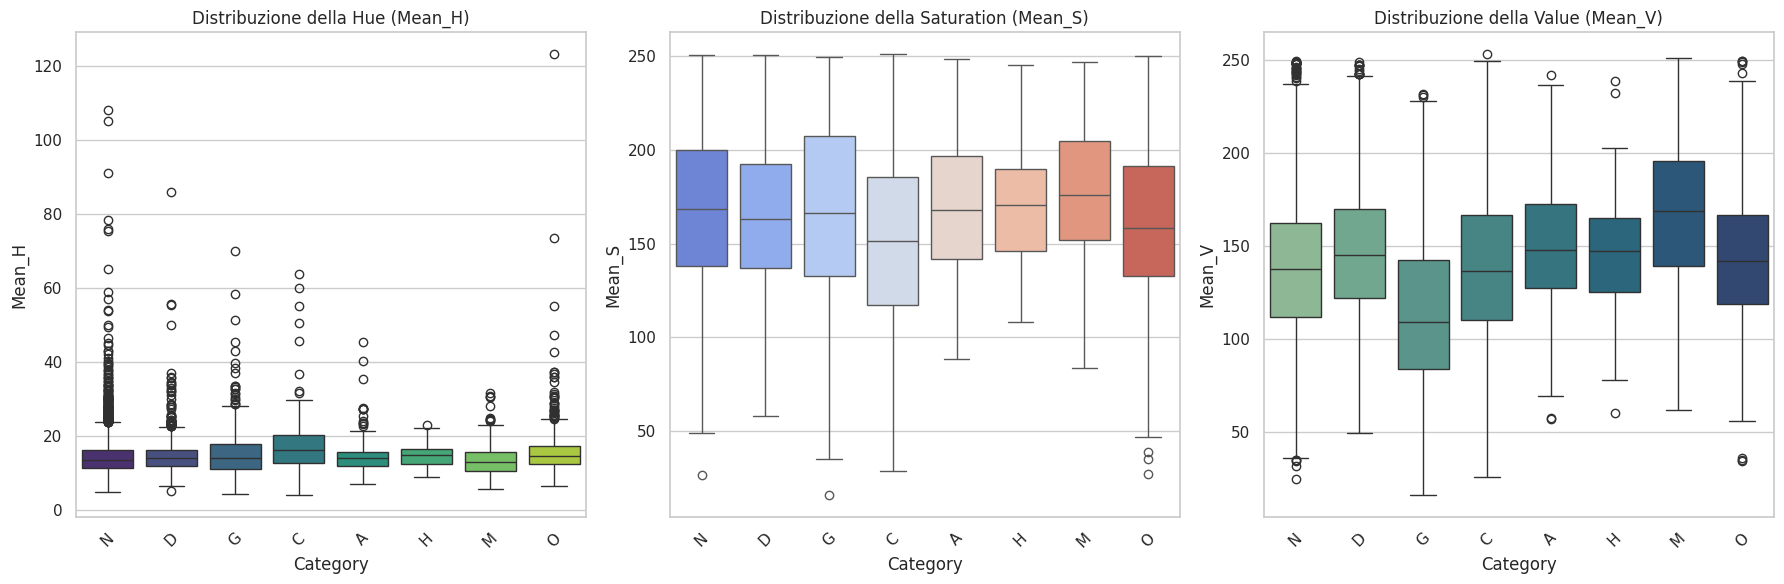

<ipython-input-4-28b30d251f66>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Category", y="Mean_H", palette="viridis", inner="box")
<ipython-input-4-28b30d251f66>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Category", y="Mean_S", palette="coolwarm", inner="box")
<ipython-input-4-28b30d251f66>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Category", y="Mean_V", palette="crest", inner="box")


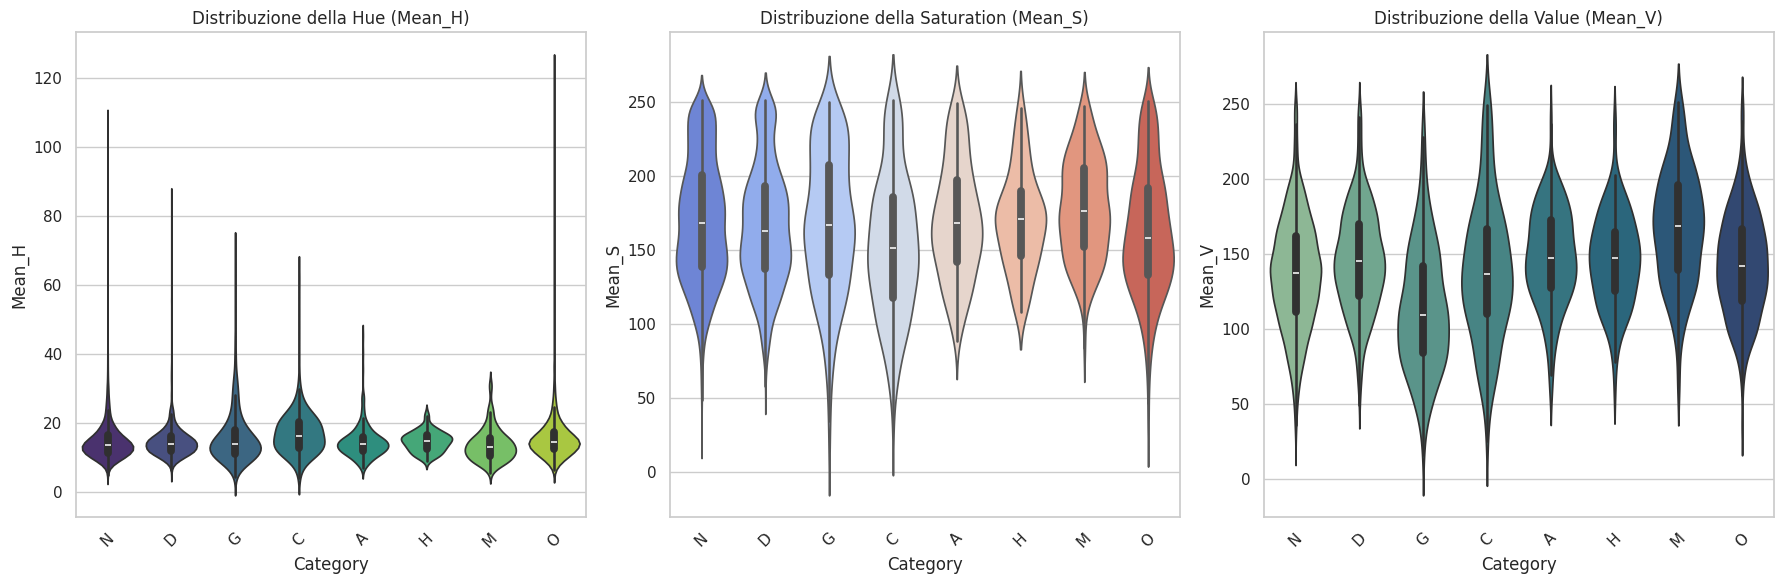

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Carica il file CSV con le statistiche HSV
file_path = "hsv_patch_stats.csv"
df = pd.read_csv(file_path)

# Configura lo stile di Seaborn
sns.set(style="whitegrid")

# Crea i boxplot per i canali H, S, V
plt.figure(figsize=(18, 6))

# Boxplot per Hue
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Category", y="Mean_H", palette="viridis")
plt.title("Distribuzione della Hue (Mean_H)")
plt.xticks(rotation=45)

# Boxplot per Saturation
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Category", y="Mean_S", palette="coolwarm")
plt.title("Distribuzione della Saturation (Mean_S)")
plt.xticks(rotation=45)

# Boxplot per Value
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Category", y="Mean_V", palette="crest")
plt.title("Distribuzione della Value (Mean_V)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
'''
# Violin plot per approfondire
plt.figure(figsize=(18, 6))

# Violin plot per Hue
plt.subplot(1, 3, 1)
sns.violinplot(data=df, x="Category", y="Mean_H", palette="viridis", inner="box")
plt.title("Distribuzione della Hue (Mean_H)")
plt.xticks(rotation=45)


# Violin plot per Saturation
plt.subplot(1, 3, 2)
sns.violinplot(data=df, x="Category", y="Mean_S", palette="coolwarm", inner="box")
plt.title("Distribuzione della Saturation (Mean_S)")
plt.xticks(rotation=45)

# Violin plot per Value
plt.subplot(1, 3, 3)
sns.violinplot(data=df, x="Category", y="Mean_V", palette="crest", inner="box")
plt.title("Distribuzione della Value (Mean_V)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
'''

In [5]:
from scipy.stats import shapiro

channels = ['Mean_H', 'Mean_S', 'Mean_V','Median_H','Median_S','Median_V','Std_H','Std_S','Std_V']
categories = df['Category'].unique()

# Test di Shapiro-Wilk per normalità
for channel in channels:
    print(f"\nTest di normalità per {channel}:")
    for category in categories:
        data = df[df['Category'] == category][channel]
        stat, p_value = shapiro(data)
        print(f"Categoria {category}: stat={stat:.4f}, p-value={p_value:.4f}")


Test di normalità per Mean_H:
Categoria N: stat=0.6677, p-value=0.0000
Categoria D: stat=0.7536, p-value=0.0000
Categoria G: stat=0.7684, p-value=0.0000
Categoria C: stat=0.8025, p-value=0.0000
Categoria A: stat=0.8128, p-value=0.0000
Categoria H: stat=0.9830, p-value=0.1099
Categoria M: stat=0.9173, p-value=0.0000
Categoria O: stat=0.5957, p-value=0.0000

Test di normalità per Mean_S:
Categoria N: stat=0.9816, p-value=0.0000
Categoria D: stat=0.9822, p-value=0.0000
Categoria G: stat=0.9766, p-value=0.0001
Categoria C: stat=0.9870, p-value=0.0097
Categoria A: stat=0.9809, p-value=0.0012
Categoria H: stat=0.9811, p-value=0.0713
Categoria M: stat=0.9853, p-value=0.0167
Categoria O: stat=0.9869, p-value=0.0000

Test di normalità per Mean_V:
Categoria N: stat=0.9976, p-value=0.0002
Categoria D: stat=0.9959, p-value=0.0002
Categoria G: stat=0.9842, p-value=0.0032
Categoria C: stat=0.9871, p-value=0.0102
Categoria A: stat=0.9930, p-value=0.2457
Categoria H: stat=0.9937, p-value=0.8458
Categ

I risultati del test di normalità indicano che quasi tutte le categorie non seguono una distribuzione normale, a eccezione di alcune categorie per alcuni canali (ad esempio, "Mean_H" per la categoria H, "Mean_S" per la categoria H, e "Mean_V" per alcune categorie). Il p-value < 0.05 suggerisce che la distribuzione si discosta dalla normalità.

---



Nonostante alcune categorie abbiano un p-value > 0.05, data l'elevata prevalenza di p-value < 0.05, è più prudente usare test non parametrici.


---


*   Test per due categorie: Usa il Mann-Whitney U test.
*   Test per più categorie: Usa il Kruskal-Wallis test.





In [6]:
from scipy.stats import kruskal

channels = ['Mean_H', 'Mean_S', 'Mean_V','Median_H','Median_S','Median_V','Std_H','Std_S','Std_V']
categories = df['Category'].unique()

kruskal_results = {}

for channel in channels:
    # Raggruppa i dati per categoria
    grouped_data = [df[df['Category'] == category][channel] for category in categories]

    # Test di Kruskal-Wallis
    kw_stat, kw_pvalue = kruskal(*grouped_data)

    kruskal_results[channel] = {"statistic": kw_stat, "p-value": kw_pvalue}

print("\nRisultati del test di Kruskal-Wallis:")
for channel, result in kruskal_results.items():
    print(f"{channel}: stat={result['statistic']:.4f}, p-value={result['p-value']:.4f}")
#Un p-value < 0.05 indica che almeno una categoria è significativamente diversa.


Risultati del test di Kruskal-Wallis:
Mean_H: stat=109.0778, p-value=0.0000
Mean_S: stat=66.1023, p-value=0.0000
Mean_V: stat=308.4974, p-value=0.0000
Median_H: stat=180.9552, p-value=0.0000
Median_S: stat=79.5860, p-value=0.0000
Median_V: stat=281.5927, p-value=0.0000
Std_H: stat=29.7967, p-value=0.0001
Std_S: stat=117.9952, p-value=0.0000
Std_V: stat=390.2728, p-value=0.0000


In [7]:
!pip install scikit-posthocs

In [8]:
import scikit_posthocs as sp
channels = ['Mean_H', 'Mean_S', 'Mean_V','Median_H','Median_S','Median_V','Std_H','Std_S','Std_V']
for channel in channels:
    # Prepara i dati per il test
    dunn_data = df[['Category', channel]].dropna()

    # Esegui il test di Dunn
    dunn_results = sp.posthoc_dunn(dunn_data, group_col='Category', val_col=channel, p_adjust='bonferroni')

    print(f"\nTest di Dunn per {channel}:")
    print(dunn_results)



Test di Dunn per Mean_H:
              A             C             D         G         H             M  \
A  1.000000e+00  1.400724e-07  1.000000e+00  1.000000  1.000000  3.135244e-01   
C  1.400724e-07  1.000000e+00  1.218414e-11  0.000011  0.090191  5.356137e-15   
D  1.000000e+00  1.218414e-11  1.000000e+00  1.000000  1.000000  5.085012e-03   
G  1.000000e+00  1.112810e-05  1.000000e+00  1.000000  1.000000  1.889942e-02   
H  1.000000e+00  9.019145e-02  1.000000e+00  1.000000  1.000000  5.313553e-03   
M  3.135244e-01  5.356137e-15  5.085012e-03  0.018899  0.005314  1.000000e+00   
N  1.000000e+00  4.018647e-16  1.000000e+00  1.000000  0.543719  9.578525e-02   
O  2.743698e-01  2.352897e-04  2.333690e-02  1.000000  1.000000  1.278771e-06   

              N         O  
A  1.000000e+00  0.274370  
C  4.018647e-16  0.000235  
D  1.000000e+00  0.023337  
G  1.000000e+00  1.000000  
H  5.437187e-01  1.000000  
M  9.578525e-02  0.000001  
N  1.000000e+00  0.000010  
O  9.715347e-06  1.0

In [9]:
alpha = 0.05  # Soglia di significatività

channels = ['Mean_H', 'Mean_S', 'Mean_V','Median_H','Median_S','Median_V','Std_H','Std_S','Std_V']

# Itera sui canali HSV
for channel in channels:
    dunn_data = df[['Category', channel]].dropna()
    dunn_results = sp.posthoc_dunn(dunn_data, group_col='Category', val_col=channel, p_adjust='bonferroni')

    # Converte la matrice dei risultati in un formato leggibile
    significant_pairs = []
    for i, category1 in enumerate(dunn_results.index):
        for j, category2 in enumerate(dunn_results.columns):
            if i < j:  # Evita duplicati e diagonale
                p_value = dunn_results.iloc[i, j]
                if p_value < alpha:
                    significant_pairs.append((category1, category2, p_value))

    # Stampa i risultati
    print(f"\nCoppie significativamente diverse per {channel}:")
    if significant_pairs:
        for pair in significant_pairs:
            print(f"{pair[0]} vs {pair[1]}: p-value = {pair[2]:.4f}")
    else:
        print("Nessuna coppia significativamente diversa trovata.")



Coppie significativamente diverse per Mean_H:
A vs C: p-value = 0.0000
C vs D: p-value = 0.0000
C vs G: p-value = 0.0000
C vs M: p-value = 0.0000
C vs N: p-value = 0.0000
C vs O: p-value = 0.0002
D vs M: p-value = 0.0051
D vs O: p-value = 0.0233
G vs M: p-value = 0.0189
H vs M: p-value = 0.0053
M vs O: p-value = 0.0000
N vs O: p-value = 0.0000

Coppie significativamente diverse per Mean_S:
A vs C: p-value = 0.0010
C vs D: p-value = 0.0003
C vs G: p-value = 0.0014
C vs H: p-value = 0.0128
C vs M: p-value = 0.0000
C vs N: p-value = 0.0000
D vs M: p-value = 0.0006
M vs N: p-value = 0.0432
M vs O: p-value = 0.0000
N vs O: p-value = 0.0006

Coppie significativamente diverse per Mean_V:
A vs C: p-value = 0.0151
A vs G: p-value = 0.0000
A vs M: p-value = 0.0000
A vs N: p-value = 0.0000
C vs D: p-value = 0.0405
C vs G: p-value = 0.0000
C vs M: p-value = 0.0000
D vs G: p-value = 0.0000
D vs M: p-value = 0.0000
D vs N: p-value = 0.0000
G vs H: p-value = 0.0000
G vs M: p-value = 0.0000
G vs N: p

Analisi per il canale: Mean_H


<ipython-input-10-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


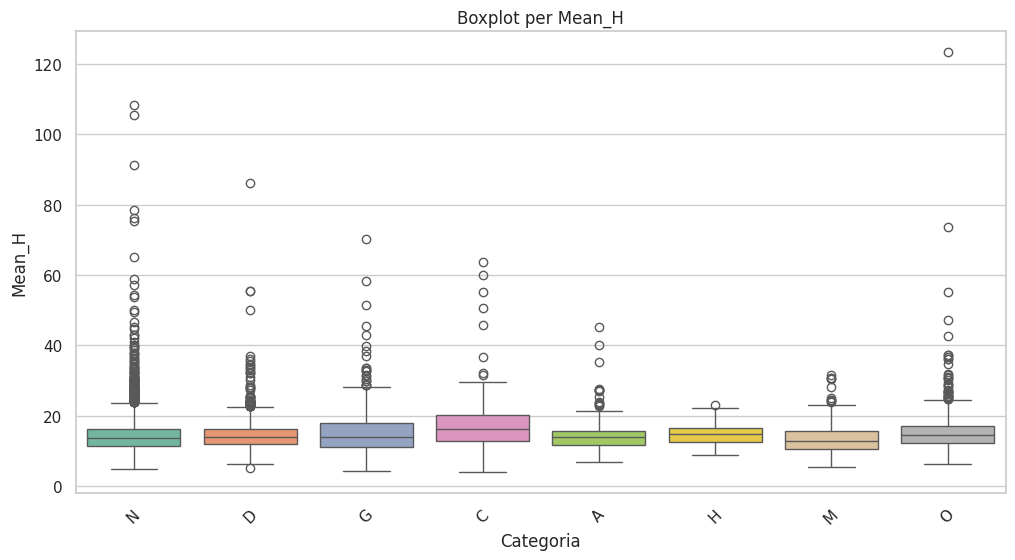

Confronto N vs D: stat=2217701.5000, p-value=2.6462e-02
 -> Differenza significativa tra N e D per Mean_H (p < 0.05)
Confronto N vs G: stat=386777.0000, p-value=1.4819e-01
 -> Nessuna differenza significativa tra N e G per Mean_H
Confronto N vs C: stat=299227.0000, p-value=3.2742e-16
 -> Differenza significativa tra N e C per Mean_H (p < 0.05)
Confronto N vs A: stat=374513.0000, p-value=5.9118e-01
 -> Nessuna differenza significativa tra N e A per Mean_H
Confronto N vs H: stat=160786.0000, p-value=1.6090e-02
 -> Differenza significativa tra N e H per Mean_H (p < 0.05)
Confronto N vs M: stat=372917.0000, p-value=2.5395e-03
 -> Differenza significativa tra N e M per Mean_H (p < 0.05)
Confronto N vs O: stat=892257.0000, p-value=4.1029e-07
 -> Differenza significativa tra N e O per Mean_H (p < 0.05)
Analisi per il canale: Mean_S


<ipython-input-10-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


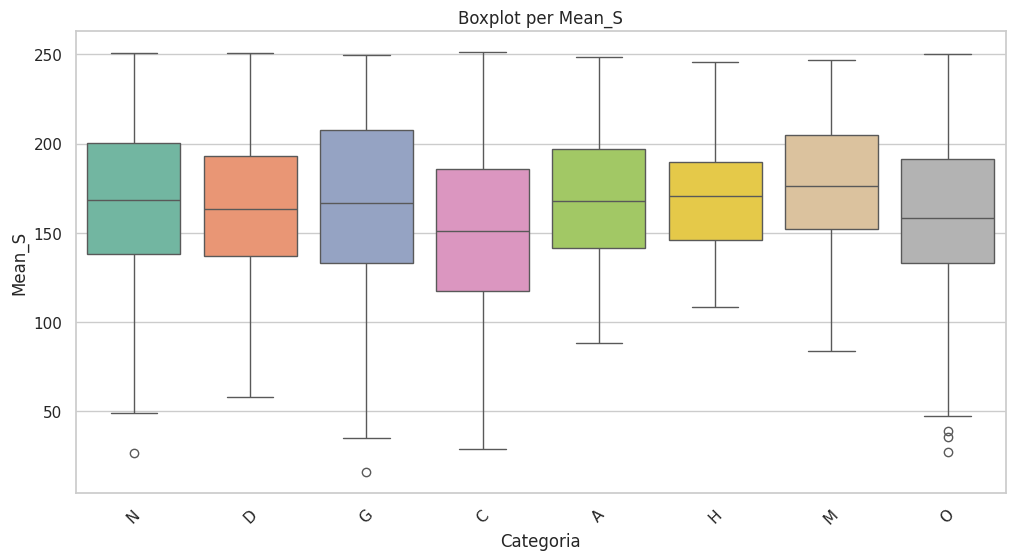

Confronto N vs D: stat=2419136.5000, p-value=8.5407e-03
 -> Differenza significativa tra N e D per Mean_S (p < 0.05)
Confronto N vs G: stat=412411.0000, p-value=7.6166e-01
 -> Nessuna differenza significativa tra N e G per Mean_S
Confronto N vs C: stat=506990.0000, p-value=7.6402e-09
 -> Differenza significativa tra N e C per Mean_S (p < 0.05)
Confronto N vs A: stat=384708.0000, p-value=8.5421e-01
 -> Nessuna differenza significativa tra N e A per Mean_S
Confronto N vs H: stat=183347.0000, p-value=9.5639e-01
 -> Nessuna differenza significativa tra N e H per Mean_S
Confronto N vs M: stat=292989.0000, p-value=2.1654e-03
 -> Differenza significativa tra N e M per Mean_S (p < 0.05)
Confronto N vs O: stat=1120934.0000, p-value=2.4843e-05
 -> Differenza significativa tra N e O per Mean_S (p < 0.05)
Analisi per il canale: Mean_V


<ipython-input-10-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


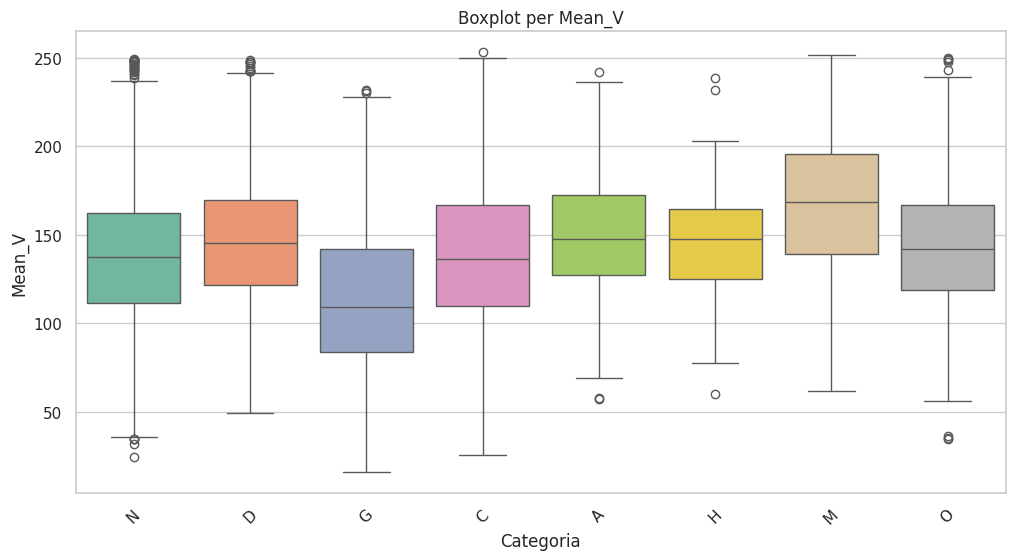

Confronto N vs D: stat=2002378.0000, p-value=1.3314e-13
 -> Differenza significativa tra N e D per Mean_V (p < 0.05)
Confronto N vs G: stat=548069.0000, p-value=1.1662e-21
 -> Differenza significativa tra N e G per Mean_V (p < 0.05)
Confronto N vs C: stat=417675.0000, p-value=8.2901e-01
 -> Nessuna differenza significativa tra N e C per Mean_V
Confronto N vs A: stat=310739.0000, p-value=4.4890e-07
 -> Differenza significativa tra N e A per Mean_V (p < 0.05)
Confronto N vs H: stat=156142.0000, p-value=3.8397e-03
 -> Differenza significativa tra N e H per Mean_V (p < 0.05)
Confronto N vs M: stat=187219.0000, p-value=1.0113e-28
 -> Differenza significativa tra N e M per Mean_V (p < 0.05)
Confronto N vs O: stat=920493.0000, p-value=8.9205e-05
 -> Differenza significativa tra N e O per Mean_V (p < 0.05)
Analisi per il canale: Median_H


<ipython-input-10-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


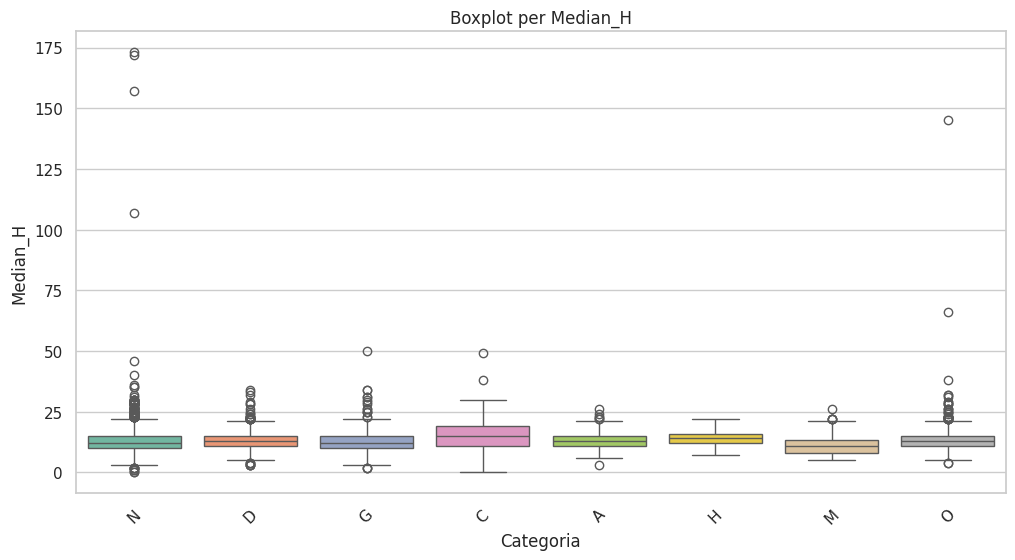

Confronto N vs D: stat=2095883.5000, p-value=2.2749e-07
 -> Differenza significativa tra N e D per Median_H (p < 0.05)
Confronto N vs G: stat=420703.0000, p-value=3.8278e-01
 -> Nessuna differenza significativa tra N e G per Median_H
Confronto N vs C: stat=290154.5000, p-value=1.3010e-18
 -> Differenza significativa tra N e C per Median_H (p < 0.05)
Confronto N vs A: stat=357305.0000, p-value=7.8130e-02
 -> Nessuna differenza significativa tra N e A per Median_H
Confronto N vs H: stat=141485.0000, p-value=9.0791e-06
 -> Differenza significativa tra N e H per Median_H (p < 0.05)
Confronto N vs M: stat=413135.5000, p-value=1.0215e-09
 -> Differenza significativa tra N e M per Median_H (p < 0.05)
Confronto N vs O: stat=891440.0000, p-value=3.0810e-07
 -> Differenza significativa tra N e O per Median_H (p < 0.05)
Analisi per il canale: Median_S


<ipython-input-10-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


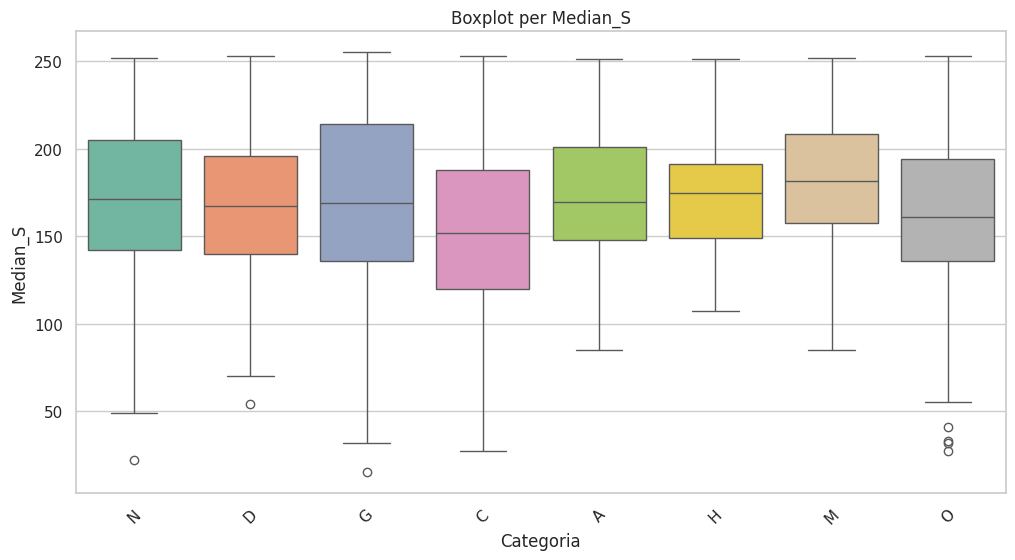

Confronto N vs D: stat=2438325.0000, p-value=1.9885e-03
 -> Differenza significativa tra N e D per Median_S (p < 0.05)
Confronto N vs G: stat=412961.5000, p-value=7.3319e-01
 -> Nessuna differenza significativa tra N e G per Median_S
Confronto N vs C: stat=512010.5000, p-value=9.7642e-10
 -> Differenza significativa tra N e C per Median_S (p < 0.05)
Confronto N vs A: stat=387298.5000, p-value=7.1365e-01
 -> Nessuna differenza significativa tra N e A per Median_S
Confronto N vs H: stat=185205.5000, p-value=8.8947e-01
 -> Nessuna differenza significativa tra N e H per Median_S
Confronto N vs M: stat=283548.0000, p-value=1.5343e-04
 -> Differenza significativa tra N e M per Median_S (p < 0.05)
Confronto N vs O: stat=1125990.5000, p-value=9.7991e-06
 -> Differenza significativa tra N e O per Median_S (p < 0.05)
Analisi per il canale: Median_V


<ipython-input-10-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


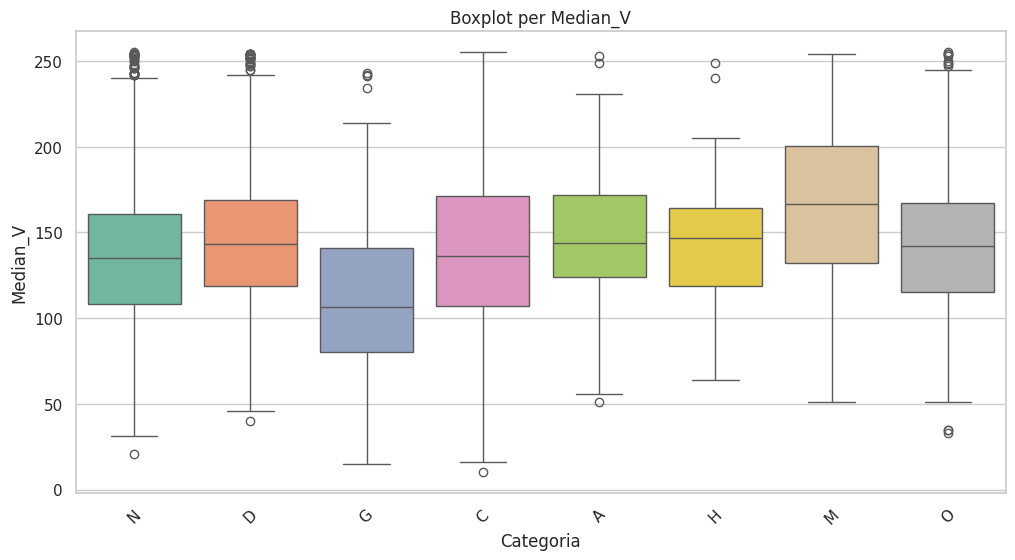

Confronto N vs D: stat=2001111.0000, p-value=1.0555e-13
 -> Differenza significativa tra N e D per Median_V (p < 0.05)
Confronto N vs G: stat=540596.5000, p-value=1.4122e-19
 -> Differenza significativa tra N e G per Median_V (p < 0.05)
Confronto N vs C: stat=401775.0000, p-value=1.9958e-01
 -> Nessuna differenza significativa tra N e C per Median_V
Confronto N vs A: stat=309765.0000, p-value=3.1206e-07
 -> Differenza significativa tra N e A per Median_V (p < 0.05)
Confronto N vs H: stat=158931.0000, p-value=9.3128e-03
 -> Differenza significativa tra N e H per Median_V (p < 0.05)
Confronto N vs M: stat=196259.5000, p-value=1.7845e-25
 -> Differenza significativa tra N e M per Median_V (p < 0.05)
Confronto N vs O: stat=918457.0000, p-value=6.3081e-05
 -> Differenza significativa tra N e O per Median_V (p < 0.05)
Analisi per il canale: Std_H


<ipython-input-10-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


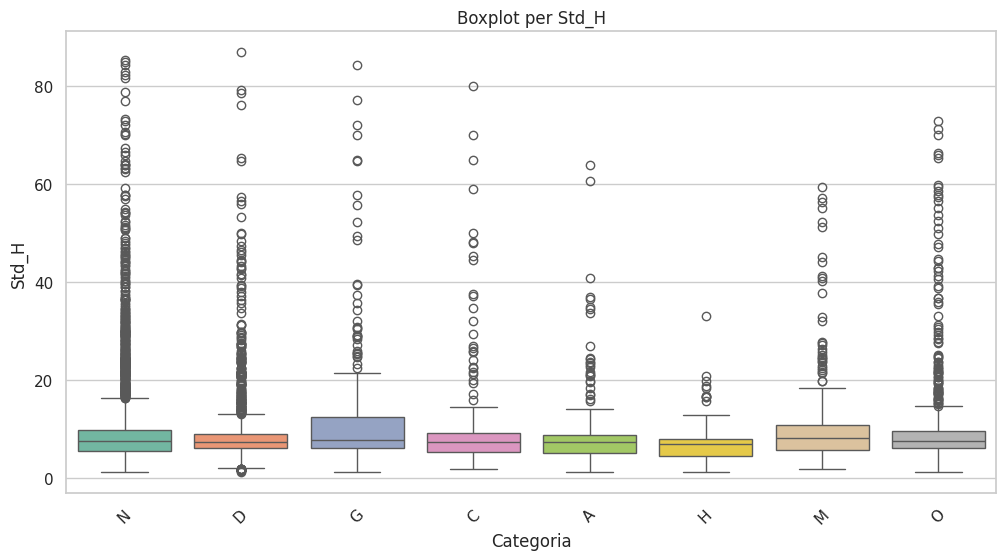

Confronto N vs D: stat=2351383.0000, p-value=3.1788e-01
 -> Nessuna differenza significativa tra N e D per Std_H
Confronto N vs G: stat=378150.0000, p-value=4.1881e-02
 -> Differenza significativa tra N e G per Std_H (p < 0.05)
Confronto N vs C: stat=439934.0000, p-value=2.0148e-01
 -> Nessuna differenza significativa tra N e C per Std_H
Confronto N vs A: stat=405819.0000, p-value=9.3613e-02
 -> Nessuna differenza significativa tra N e A per Std_H
Confronto N vs H: stat=211725.0000, p-value=3.6859e-03
 -> Differenza significativa tra N e H per Std_H (p < 0.05)
Confronto N vs M: stat=298768.0000, p-value=8.6247e-03
 -> Differenza significativa tra N e M per Std_H (p < 0.05)
Confronto N vs O: stat=997328.0000, p-value=4.2369e-01
 -> Nessuna differenza significativa tra N e O per Std_H
Analisi per il canale: Std_S


<ipython-input-10-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


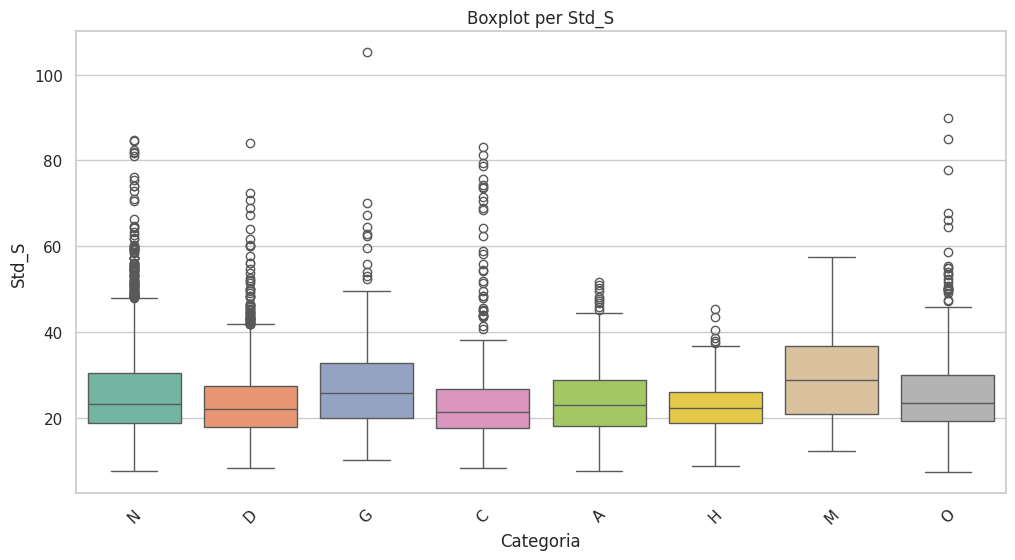

Confronto N vs D: stat=2552434.0000, p-value=5.2551e-09
 -> Differenza significativa tra N e D per Std_S (p < 0.05)
Confronto N vs G: stat=361497.0000, p-value=1.5184e-03
 -> Differenza significativa tra N e G per Std_S (p < 0.05)
Confronto N vs C: stat=467930.0000, p-value=1.6015e-03
 -> Differenza significativa tra N e C per Std_S (p < 0.05)
Confronto N vs A: stat=403372.0000, p-value=1.3269e-01
 -> Nessuna differenza significativa tra N e A per Std_S
Confronto N vs H: stat=204879.0000, p-value=2.8516e-02
 -> Differenza significativa tra N e H per Std_S (p < 0.05)
Confronto N vs M: stat=250580.0000, p-value=3.0676e-10
 -> Differenza significativa tra N e M per Std_S (p < 0.05)
Confronto N vs O: stat=1007057.0000, p-value=6.8533e-01
 -> Nessuna differenza significativa tra N e O per Std_S
Analisi per il canale: Std_V


<ipython-input-10-010e05b3c3f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


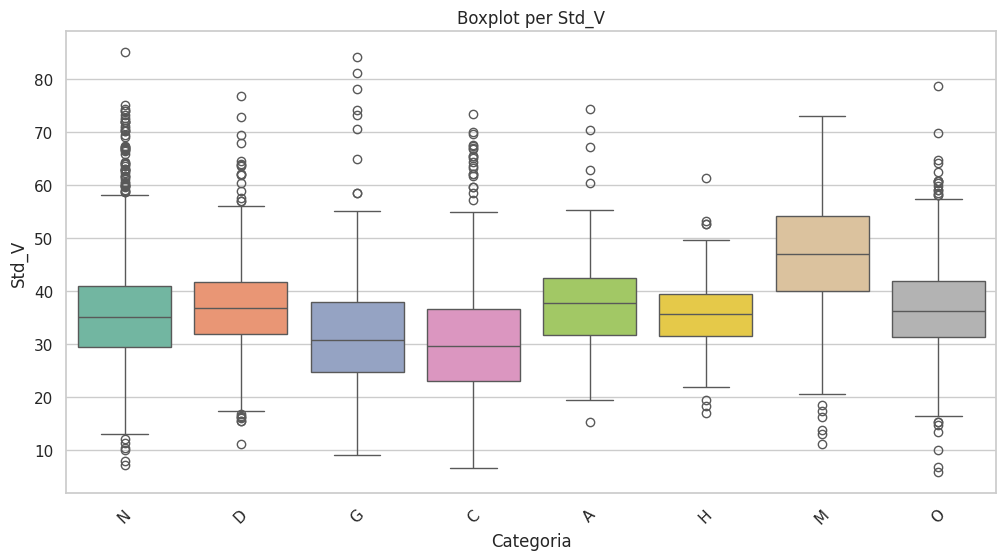

Confronto N vs D: stat=2078352.0000, p-value=2.4892e-08
 -> Differenza significativa tra N e D per Std_V (p < 0.05)
Confronto N vs G: stat=493089.0000, p-value=6.2844e-09
 -> Differenza significativa tra N e G per Std_V (p < 0.05)
Confronto N vs C: stat=538729.0000, p-value=2.6662e-15
 -> Differenza significativa tra N e C per Std_V (p < 0.05)
Confronto N vs A: stat=327556.0000, p-value=1.1444e-04
 -> Differenza significativa tra N e A per Std_V (p < 0.05)
Confronto N vs H: stat=178955.0000, p-value=6.0824e-01
 -> Nessuna differenza significativa tra N e H per Std_V
Confronto N vs M: stat=138699.0000, p-value=1.2026e-49
 -> Differenza significativa tra N e M per Std_V (p < 0.05)
Confronto N vs O: stat=931307.0000, p-value=5.0262e-04
 -> Differenza significativa tra N e O per Std_V (p < 0.05)


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


# Funzione per creare boxplot e calcolare test statistici
def analyze_channel(df, channel, categories):
    print(f"Analisi per il canale: {channel}")

    # Creazione del boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')
    plt.title(f'Boxplot per {channel}')
    plt.xlabel('Categoria')
    plt.ylabel(channel)
    plt.xticks(rotation=45)
    plt.show()

    # Confronto tra Normale (N) e ciascuna patologia
    normal_values = df[df['Category'] == 'N'][channel].dropna()
    for category in categories:
        if category == 'N':
            continue
        category_values = df[df['Category'] == category][channel].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(normal_values, category_values, alternative='two-sided')
        print(f"Confronto N vs {category}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra N e {category} per {channel} (p < 0.05)")
        else:
            print(f" -> Nessuna differenza significativa tra N e {category} per {channel}")

# Analisi per ciascun canale HSV
for channel in channels:
    analyze_channel(df, channel, categories)


*  Hue (H): Differenze nei colori dominanti
Interpreta i valori di Hue:
Ad esempio, valori di Hue bassi indicano tonalità rosse, mentre valori alti indicano verde/blu.
*  Saturation (S): Differenze nell'intensità cromatica
  1.  Confronta le intensità di saturazione.
  2. Le immagini patologiche potrebbero avere una saturazione ridotta a causa di opacità o variazioni nei tessuti.
*  Value (V): Differenze nella luminosità
  1. Confronta la luminosità media.
  2. Le immagini con patologie potrebbero mostrare valori medi più bassi di luminosità (ad esempio, lesioni più scure).







---

# TEXTURE DESCRIPTORS

In [11]:
#TEXTURE DESCRIPTORS
#entropia
from skimage import io
from skimage.color import rgb2gray
import os

def calculate_entropy_and_histogram(image):
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    # Normalize the histogram
    hist_norm = hist / hist.sum()
    # Remove zero probabilities
    hist_norm = hist_norm[hist_norm > 0]
    # Calculate entropy
    entropy = -np.sum(hist_norm * np.log2(hist_norm))
    return entropy

# Calcola l'entropia per tutte le immagini
entropy_results = []

for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img_gray=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    img_entropy = calculate_entropy_and_histogram(img_gray)
    entropy_results.append({'Category': category, 'Image': file, 'Entropy': img_entropy})

# Salva i risultati in un DataFrame
entropy_df = pd.DataFrame(entropy_results)

# Salva su CSV per future analisi
entropy_df.to_csv('entropy_results.csv', index=False)
print("Entropia calcolata e salvata in entropy_results.csv.")


'''
N, D, G, C, A, H, M, O = [], [], [], [], [], [], [], []
S_entropy = [N,D,G,C,A,H,M,O]

for i in range(len(TOT)):
  for file in TOT[i]:
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img_gray=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    hist, entropy = calculate_entropy_and_histogram(img_gray)
    S_entropy[i].append(entropy)
'''

Entropia calcolata e salvata in entropy_results.csv.


"\nN, D, G, C, A, H, M, O = [], [], [], [], [], [], [], []\nS_entropy = [N,D,G,C,A,H,M,O]\n\nfor i in range(len(TOT)):\n  for file in TOT[i]:\n    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)\n    img_gray=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)\n    hist, entropy = calculate_entropy_and_histogram(img_gray)\n    S_entropy[i].append(entropy)\n"

<ipython-input-12-29f855c79587>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Entropy', data=entropy_df, order=categories, palette='Set3')


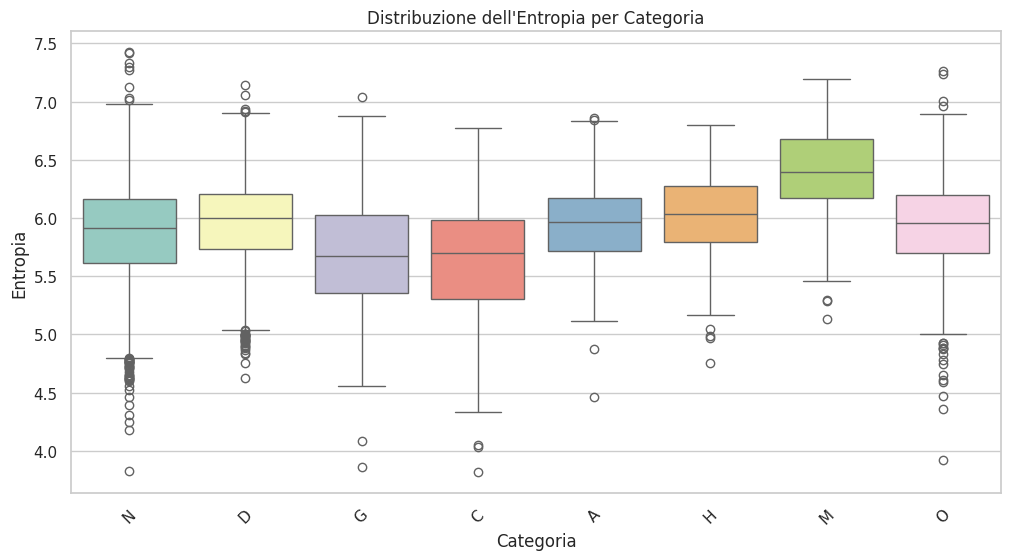

In [12]:
# Boxplot per l'entropia
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Entropy', data=entropy_df, order=categories, palette='Set3')
plt.title('Distribuzione dell\'Entropia per Categoria')
plt.xlabel('Categoria')
plt.ylabel('Entropia')
plt.xticks(rotation=45)
plt.show()


In [13]:
# Test di Shapiro-Wilk per ciascuna categoria
shapiro_results = []

# Raggruppa le entropie per categoria
for category in entropy_df['Category'].unique():
    category_entropy = entropy_df[entropy_df['Category'] == category]['Entropy']
    stat, p_value = shapiro(category_entropy)
    shapiro_results.append({'Category': category, 'Shapiro_Stat': stat, 'P_Value': p_value})
    print(f"Test di Shapiro-Wilk per categoria {category}: Stat = {stat:.4f}, P-value = {p_value:.4f}")
    if p_value > 0.05:
        print(f"  La distribuzione per {category} è normale (p-value > 0.05).\n")
    else:
        print(f"  La distribuzione per {category} NON è normale (p-value <= 0.05).\n")


Test di Shapiro-Wilk per categoria N: Stat = 0.9906, P-value = 0.0000
  La distribuzione per N NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria D: Stat = 0.9873, P-value = 0.0000
  La distribuzione per D NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria G: Stat = 0.9938, P-value = 0.3001
  La distribuzione per G è normale (p-value > 0.05).

Test di Shapiro-Wilk per categoria C: Stat = 0.9824, P-value = 0.0011
  La distribuzione per C NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria A: Stat = 0.9890, P-value = 0.0401
  La distribuzione per A NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria H: Stat = 0.9740, P-value = 0.0144
  La distribuzione per H NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria M: Stat = 0.9832, P-value = 0.0076
  La distribuzione per M NON è normale (p-value <= 0.05).

Test di Shapiro-Wilk per categoria O: Stat = 0.9820, P-value = 0.0000
  La distribuzione per O NON è n

In [14]:
# Raggruppa le entropie per categoria
categories = entropy_df['Category'].unique()
entropy_data = [entropy_df[entropy_df['Category'] == category]['Entropy'] for category in categories]

# Test di Kruskal-Wallis
kruskal_stat, kruskal_p = kruskal(*entropy_data)
print(f"Test di Kruskal-Wallis: Stat = {kruskal_stat:.4f}, P-value = {kruskal_p:.4f}")

if kruskal_p <= 0.05:
    print("Esistono differenze significative tra le categorie (p <= 0.05). Procedo con il test di Dunn.\n")
else:
    print("Non ci sono differenze significative tra le categorie (p > 0.05).\n")

# Test di Dunn per confronti post-hoc
dunn_results = sp.posthoc_dunn(entropy_df, val_col='Entropy', group_col='Category', p_adjust='bonferroni')

# Mostra i risultati
print("\nRisultati del test di Dunn (p-value):")
print(dunn_results)


Test di Kruskal-Wallis: Stat = 486.8738, P-value = 0.0000
Esistono differenze significative tra le categorie (p <= 0.05). Procedo con il test di Dunn.


Risultati del test di Dunn (p-value):
              A             C             D             G             H  \
A  1.000000e+00  5.566980e-11  1.000000e+00  5.372074e-09  1.000000e+00   
C  5.566980e-11  1.000000e+00  5.992880e-23  1.000000e+00  1.015619e-12   
D  1.000000e+00  5.992880e-23  1.000000e+00  6.698436e-19  1.000000e+00   
G  5.372074e-09  1.000000e+00  6.698436e-19  1.000000e+00  5.213167e-11   
H  1.000000e+00  1.015619e-12  1.000000e+00  5.213167e-11  1.000000e+00   
M  4.262663e-29  3.830579e-75  7.770143e-43  1.953416e-69  1.842515e-12   
N  3.624351e-01  3.062684e-11  3.562622e-10  1.862510e-08  1.431434e-03   
O  1.000000e+00  7.196425e-16  1.000000e+00  6.883561e-13  7.159458e-01   

              M             N             O  
A  4.262663e-29  3.624351e-01  1.000000e+00  
C  3.830579e-75  3.062684e-11  7.196425e-

Analisi per l'entropia


<ipython-input-15-93ea501d37b6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Entropy', data=df, order=categories, palette='Set3')


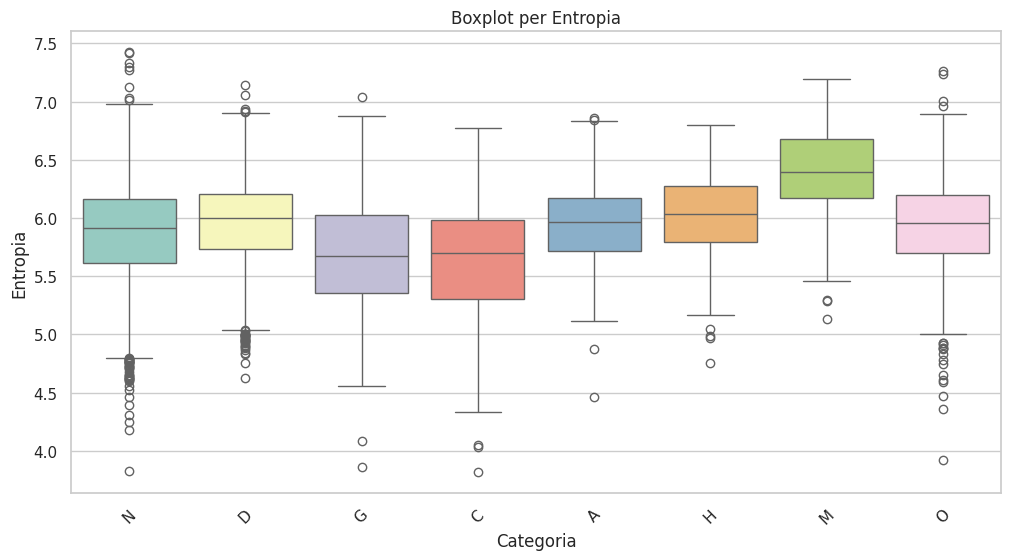

Confronto N vs D: stat=2020417.5000, p-value=3.1982e-12
 -> Differenza significativa tra N e D per Entropia (p < 0.05)
Confronto N vs G: stat=502302.0000, p-value=1.2127e-10
 -> Differenza significativa tra N e G per Entropia (p < 0.05)
Confronto N vs C: stat=531109.5000, p-value=1.4203e-13
 -> Differenza significativa tra N e C per Entropia (p < 0.05)
Confronto N vs A: stat=345081.0000, p-value=8.8334e-03
 -> Differenza significativa tra N e A per Entropia (p < 0.05)
Confronto N vs H: stat=144787.0000, p-value=4.6034e-05
 -> Differenza significativa tra N e H per Entropia (p < 0.05)
Confronto N vs M: stat=108332.5000, p-value=9.6312e-66
 -> Differenza significativa tra N e M per Entropia (p < 0.05)
Confronto N vs O: stat=926130.0000, p-value=2.2474e-04
 -> Differenza significativa tra N e O per Entropia (p < 0.05)


In [15]:
from scipy.stats import mannwhitneyu
entropy_results_betweencat=[]
def analyze_entropy(df, categories):
    print("Analisi per l'entropia")

    # Creazione del boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y='Entropy', data=df, order=categories, palette='Set3')
    plt.title('Boxplot per Entropia')
    plt.xlabel('Categoria')
    plt.ylabel('Entropia')
    plt.xticks(rotation=45)
    plt.show()

    # Confronto tra Normale (N) e ciascuna patologia
    normal_values = df[df['Category'] == 'N']['Entropy'].dropna()
    for category in categories:
        if category == 'N':
            continue
        category_values = df[df['Category'] == category]['Entropy'].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(normal_values, category_values, alternative='two-sided')
        print(f"Confronto N vs {category}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra N e {category} per Entropia (p < 0.05)")
        else:
            print(f" -> Nessuna differenza significativa tra N e {category} per Entropia")
        entropy_results_betweencat.append({'Category': category, 'p-value':p_value})
# Chiamata della funzione per analizzare l'entropia
analyze_entropy(entropy_df, categories)

# Salva i risultati in un DataFrame
entropy_pvalue_df = pd.DataFrame(entropy_results_betweencat)

# Salva su CSV per future analisi
entropy_pvalue_df.to_csv('entropy_results_betweencat.csv', index=False)

In [16]:
files.download('entropy_results_betweencat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#CONFRONTO TRA LE MALATTIE


'''from itertools import combinations
from scipy.stats import mannwhitneyu

def analyze_entropy_all_pairs(df, categories):
    print("Confronti tra tutte le categorie per l'entropia\n")

    # Creazione dei confronti a coppie
    for cat1, cat2 in combinations(categories, 2):
        values_cat1 = df[df['Category'] == cat1]['Entropy'].dropna()
        values_cat2 = df[df['Category'] == cat2]['Entropy'].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(values_cat1, values_cat2, alternative='two-sided')

        # Stampa dei risultati
        print(f"Confronto {cat1} vs {cat2}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra {cat1} e {cat2} (p < 0.05)\n")
        else:
            print(f" -> Nessuna differenza significativa tra {cat1} e {cat2}\n")
# Esegui il confronto tra tutte le categorie
analyze_entropy_all_pairs(entropy_df, categories)'''

'from itertools import combinations\nfrom scipy.stats import mannwhitneyu\n\ndef analyze_entropy_all_pairs(df, categories):\n    print("Confronti tra tutte le categorie per l\'entropia\n")\n    \n    # Creazione dei confronti a coppie\n    for cat1, cat2 in combinations(categories, 2):\n        values_cat1 = df[df[\'Category\'] == cat1][\'Entropy\'].dropna()\n        values_cat2 = df[df[\'Category\'] == cat2][\'Entropy\'].dropna()\n\n        # Test di Mann-Whitney U (non parametrico)\n        stat, p_value = mannwhitneyu(values_cat1, values_cat2, alternative=\'two-sided\')\n\n        # Stampa dei risultati\n        print(f"Confronto {cat1} vs {cat2}: stat={stat:.4f}, p-value={p_value:.4e}")\n\n        if p_value < 0.05:\n            print(f" -> Differenza significativa tra {cat1} e {cat2} (p < 0.05)\n")\n        else:\n            print(f" -> Nessuna differenza significativa tra {cat1} e {cat2}\n")\n# Esegui il confronto tra tutte le categorie\nanalyze_entropy_all_pairs(entropy_df, cat



---

# ANALISI INTERMEDIA


Analisi per la feature: Mean_H
Kruskal-Wallis: stat=109.0778, p-value=1.4264e-20
 -> Differenza significativa globale per Mean_H (p < 0.05)
   -> Differenza significativa tra A e C: p-value=1.4007e-07
   -> Differenza significativa tra C e D: p-value=1.2184e-11
   -> Differenza significativa tra C e G: p-value=1.1128e-05
   -> Differenza significativa tra C e M: p-value=5.3561e-15
   -> Differenza significativa tra C e N: p-value=4.0186e-16
   -> Differenza significativa tra C e O: p-value=2.3529e-04
   -> Differenza significativa tra D e M: p-value=5.0850e-03
   -> Differenza significativa tra D e O: p-value=2.3337e-02
   -> Differenza significativa tra G e M: p-value=1.8899e-02
   -> Differenza significativa tra H e M: p-value=5.3136e-03
   -> Differenza significativa tra M e O: p-value=1.2788e-06
   -> Differenza significativa tra N e O: p-value=9.7153e-06


<ipython-input-30-f1ef587dede3>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y=feature, order=categories, palette='Set3')


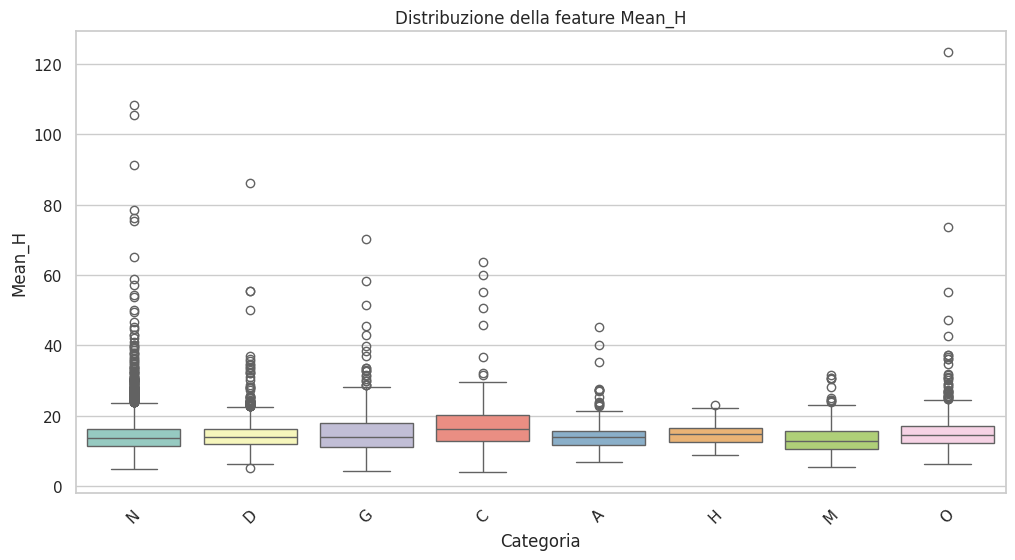


Analisi per la feature: Mean_S
Kruskal-Wallis: stat=66.1023, p-value=9.0265e-12
 -> Differenza significativa globale per Mean_S (p < 0.05)
   -> Differenza significativa tra A e C: p-value=9.9631e-04
   -> Differenza significativa tra C e D: p-value=3.4431e-04
   -> Differenza significativa tra C e G: p-value=1.3558e-03
   -> Differenza significativa tra C e H: p-value=1.2770e-02
   -> Differenza significativa tra C e M: p-value=1.5917e-09
   -> Differenza significativa tra C e N: p-value=1.2613e-07
   -> Differenza significativa tra D e M: p-value=6.1463e-04
   -> Differenza significativa tra M e N: p-value=4.3174e-02
   -> Differenza significativa tra M e O: p-value=5.2931e-06
   -> Differenza significativa tra N e O: p-value=6.2057e-04


<ipython-input-30-f1ef587dede3>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y=feature, order=categories, palette='Set3')


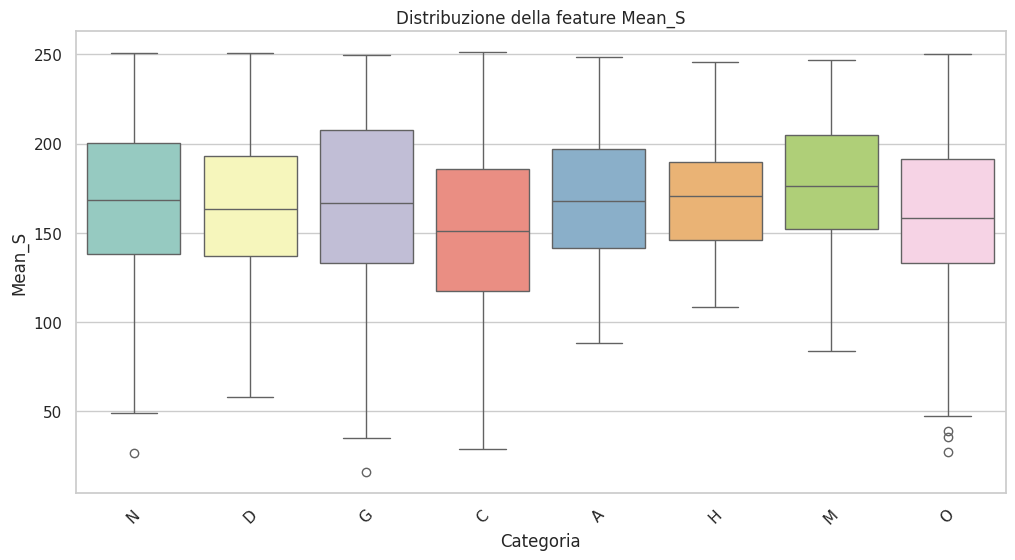


Analisi per la feature: Mean_V
Kruskal-Wallis: stat=308.4974, p-value=9.2612e-63
 -> Differenza significativa globale per Mean_V (p < 0.05)
   -> Differenza significativa tra A e C: p-value=1.5085e-02
   -> Differenza significativa tra A e G: p-value=3.3551e-24
   -> Differenza significativa tra A e M: p-value=1.2456e-05
   -> Differenza significativa tra A e N: p-value=2.0486e-05
   -> Differenza significativa tra C e D: p-value=4.0472e-02
   -> Differenza significativa tra C e G: p-value=1.5931e-11
   -> Differenza significativa tra C e M: p-value=5.5102e-16
   -> Differenza significativa tra D e G: p-value=3.1142e-34
   -> Differenza significativa tra D e M: p-value=2.5735e-13
   -> Differenza significativa tra D e N: p-value=9.4727e-12
   -> Differenza significativa tra G e H: p-value=1.9920e-13
   -> Differenza significativa tra G e M: p-value=7.4057e-51
   -> Differenza significativa tra G e N: p-value=5.8424e-19
   -> Differenza significativa tra G e O: p-value=2.6729e-24
   ->

<ipython-input-30-f1ef587dede3>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y=feature, order=categories, palette='Set3')


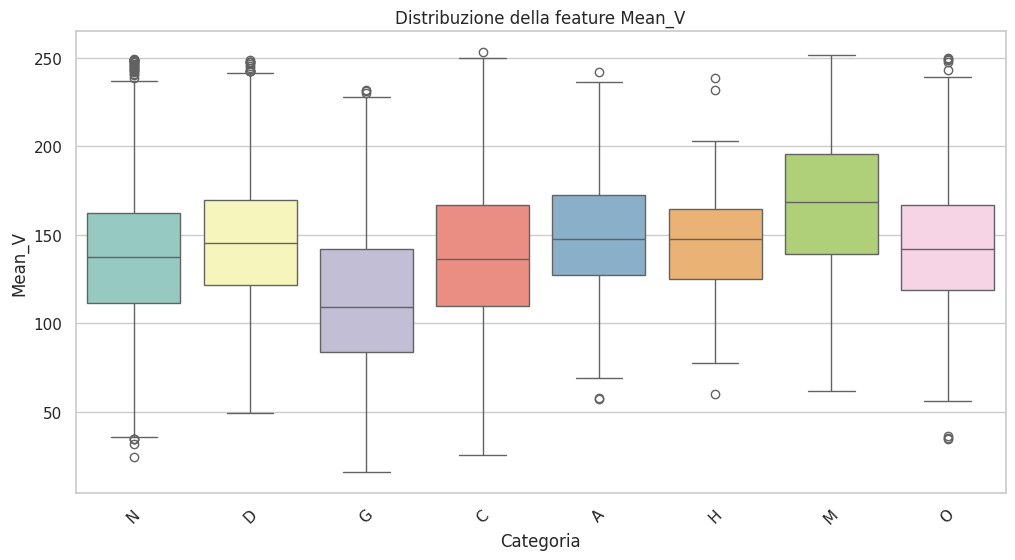


Analisi per la feature: Entropy


KeyError: 'Entropy'

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu
from scikit_posthocs import posthoc_dunn

# Funzione per analizzare le feature
def feature_discrimination_analysis(df, features, categories):
    """
    Identifica le feature che meglio discriminano tra le categorie.
    - df: DataFrame con i dati
    - features: Lista delle feature da analizzare
    - categories: Lista delle categorie
    """
    results = []

    for feature in features:
        print(f"\nAnalisi per la feature: {feature}")

        # Test di Kruskal-Wallis per la significatività globale
        grouped_data = [df[df['Category'] == cat][feature].dropna() for cat in categories]
        kw_stat, kw_p_value = kruskal(*grouped_data)
        print(f"Kruskal-Wallis: stat={kw_stat:.4f}, p-value={kw_p_value:.4e}")

        # Aggiunta al risultato
        results.append({'Feature': feature, 'KW_Stat': kw_stat, 'KW_P_Value': kw_p_value})

        # Se la differenza globale è significativa
        if kw_p_value < 0.05:
            print(f" -> Differenza significativa globale per {feature} (p < 0.05)")

            # Test di Dunn per confronti post-hoc
            dunn_results = posthoc_dunn(df, val_col=feature, group_col='Category', p_adjust='bonferroni')

            # Identifica le coppie significative
            significant_pairs = []
            for i, cat1 in enumerate(dunn_results.index):
                for j, cat2 in enumerate(dunn_results.columns):
                    if i < j:  # Evita duplicati
                        p_value = dunn_results.iloc[i, j]
                        if p_value < 0.05:
                            significant_pairs.append((cat1, cat2, p_value))
                            print(f"   -> Differenza significativa tra {cat1} e {cat2}: p-value={p_value:.4e}")

            # Visualizzazione della distribuzione della feature
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df, x='Category', y=feature, order=categories, palette='Set3')
            plt.title(f"Distribuzione della feature {feature}")
            plt.xlabel("Categoria")
            plt.ylabel(feature)
            plt.xticks(rotation=45)
            plt.show()

    # Salva i risultati in un DataFrame
    results_df = pd.DataFrame(results)
    return results_df


# Assicurati che ci sia una colonna comune per unire i dati
common_key = 'Image'  # Sostituisci con la tua colonna di chiave comune
if common_key not in df.columns or common_key not in entropy_df.columns:
    raise ValueError(f"La colonna comune '{common_key}' non è presente in entrambi i file.")

# Unisci i dati
df = pd.merge(df, entropy_df, on=common_key)

# Assicurati che ci sia una colonna per le categorie
category_col = 'Category' # Sostituisci con la tua colonna delle categorie
if category_col not in df.columns:
    raise ValueError(f"La colonna '{category_col}' con le categorie non è presente nei dati uniti.")

# Ora possiamo procedere con l'analisi
features_to_analyze = ['Mean_H', 'Mean_S', 'Mean_V', 'Entropy']
categories = df[category_col].unique()

# Chiamata alla funzione per l'analisi delle feature
analysis_results = feature_discrimination_analysis(df, features_to_analyze, categories)

# Visualizza i risultati
print("\nRisultati dell'analisi delle feature:")
print(analysis_results)

# Heatmap dei p-value
plt.figure(figsize=(8, 6))
sns.heatmap(analysis_results.pivot(index='Feature', columns='Feature', values='KW_P_Value'), annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap dei p-value delle feature (Kruskal-Wallis)")
plt.show()




---
# GLCM


In [19]:
#GLCM
from skimage.feature import graycomatrix, graycoprops

# GLCM parameters
distances = [1, 2, 3]  # Distances between pixel pairs
angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Angles (0°, 45°, 90°, 135°)

def calculate_glcm_features(image, distances, angles, levels=8):
    features = {}
    """
    Calculate GLCM and extract texture features.

    Parameters:
        - image: Grayscale input image
        - distances: List of pixel pair distances for GLCM computation
        - angles: List of angles (in radians) for GLCM computation
        - levels: Number of gray levels in the image
    Returns:
        - features: Dictionary with GLCM features (contrast, correlation, energy, homogeneity)
    """
    for d in distances:
        for a in angles:
            # Calcola GLCM per ogni combinazione di distanza e angolo
            glcm = graycomatrix(image, distances=[d], angles=[a], levels=levels, symmetric=True, normed=True)
            angle_str = f"{np.degrees(a):.1f}"
            # Estrai le features e aggiungi al dizionario con chiavi uniche
            features[f'contrast_d{d}_a{angle_str}'] = graycoprops(glcm, 'contrast')[0, 0]
            features[f'correlation_d{d}_a{angle_str}'] = graycoprops(glcm, 'correlation')[0, 0]
            features[f'energy_d{d}_a{angle_str}'] = graycoprops(glcm, 'energy')[0, 0]
            features[f'homogeneity_d{d}_a{angle_str}'] = graycoprops(glcm, 'homogeneity')[0, 0]

    return features

# DataFrame per memorizzare le feature GLCM
columns = ['filename', 'class'] + [f"{stat}_d{d}_a{angle}"
                                   for d in distances
                                   for angle in [f"{np.degrees(a):.1f}" for a in angles]
                                   for stat in ['contrast', 'correlation', 'energy', 'homogeneity']]
rows =[]

# Loop sulle immagini
for i in range(len(TOT)):  # Per ogni classe
    for file in TOT[i]:  # Per ogni immagine nella classe
        img_bgr = cv2.imread(immaginipath + '/' + file, cv2.IMREAD_COLOR)

        # Preprocessamento immagine
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        normalized_image = (img_gray / (256 // 8)).astype('uint8')

        # Calcolo delle feature GLCM
        features_glcm = calculate_glcm_features(normalized_image, distances, angles)

        # Aggiungi i risultati
        row = {'filename': file, 'class': TOT[i]}
        row.update(features_glcm)  # Aggiungi le feature calcolate
        rows.append(row)

features_df = pd.DataFrame(rows, columns=columns)



---

# SHAPE DESCRIPTORS

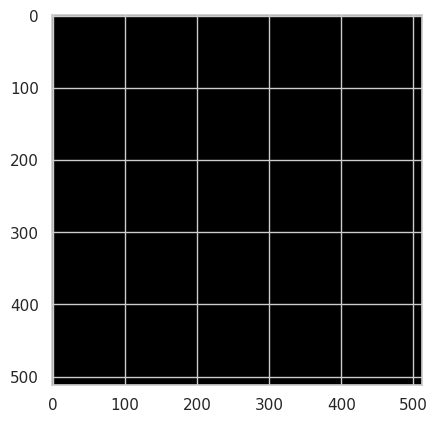

Perimeter: 56.49, Area: 0.00, Eccentricity: 1.00, Compactness: 199.74, Circularity: 0.00
Perimeter: 40.14, Area: 0.00, Eccentricity: 1.00, Compactness: 72.44, Circularity: 0.00


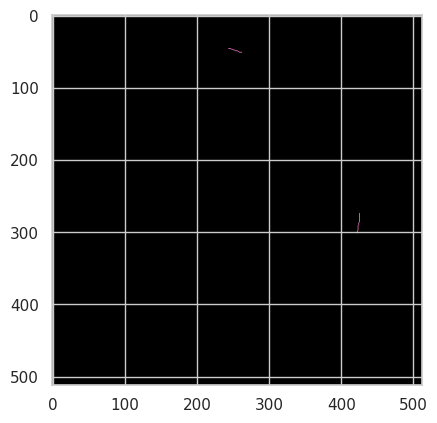

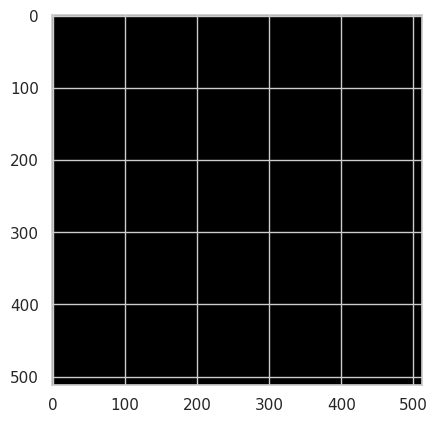

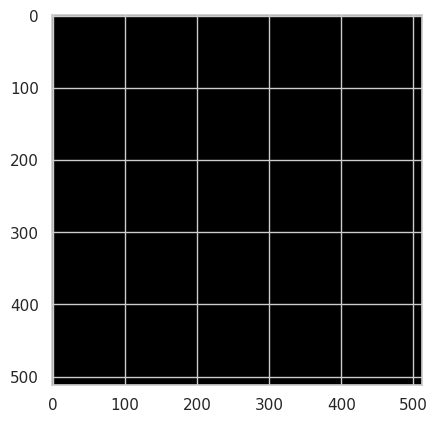

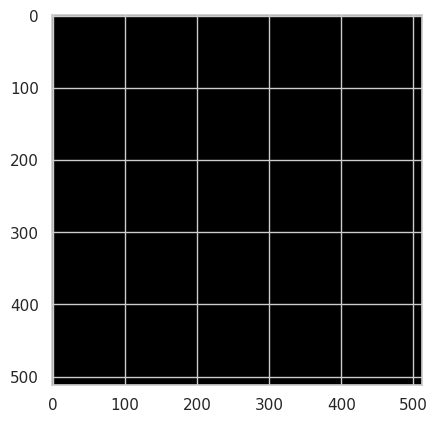

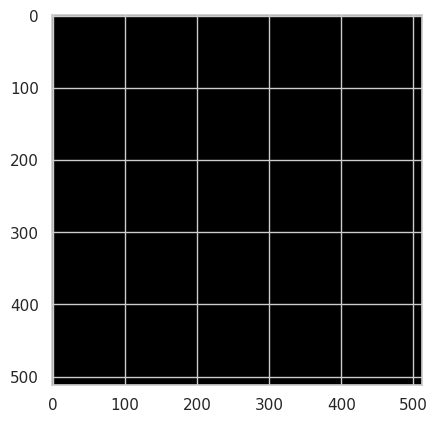

Perimeter: 15.31, Area: 0.00, Eccentricity: 0.83, Compactness: 27.65, Circularity: 0.00


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'fitEllipseNoDirect'


In [32]:
# SHAPE DESCRIPTORS
'''
cv2.circle(img_gray, (25,25), 20, 255, -1)
cv2.rectangle(img_gray, (100,10), (50,30), 255, -1)
edges = cv2.Canny(img_gray, 100, 200)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
'''


for file in TOT[1]:
  img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
  img_gray=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
  cv2.circle(img_gray, (25,25), 20, 255, -1)
  cv2.rectangle(img_gray, (100,10), (50,30), 255, -1)
  edges = cv2.Canny(img_gray, 100, 200)
  bg = np.zeros((img_gray.shape[0],img_gray.shape[1],3),dtype = np.uint8)
  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    c,s,a = cv2.fitEllipse(contour)
    eccentricity = np.sqrt(1 - ((s[0]/s[1])**2))
    if (4 * np.pi * area)!=0:
      compactness = (perimeter ** 2) / (4 * np.pi * area)
      continue
    circularity = (4 * np.pi * area) / (perimeter ** 2)
    print(f"Perimeter: {perimeter:.2f}, Area: {area:.2f}, Eccentricity: {eccentricity:.2f}, Compactness: {compactness:.2f}, Circularity: {circularity:.2f}")

    cv2.drawContours(bg, [contour], -1, (255,128,210), 1)
  plt.imshow(bg)
  plt.show()
